# Visualise and Analyse Final Dataset

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import mode

The lastest year with most data available is **2014**. Whenever a year is to be chosen, analysis will be conducted for  this year. Will use a range if it is necessary to generalise, acquire more results, this is another reason that a variable is used instead of hard coding.

In [3]:
magic_year = 2014

In [4]:
ds = pd.read_csv("project_data.csv")

ds.head()

,country_name,country_code,gdp_2004,gdp_2005,gdp_2006,gdp_2007,gdp_2008,gdp_2009,gdp_2010,gdp_2011,...,economic_freedom_index_2011,economic_freedom_index_2012,economic_freedom_index_2013,economic_freedom_index_2014,democracy_score_2016,democracy_score_2011,democracy_score_2012,democracy_score_2013,democracy_score_2014,democracy_score_2015
0,Angola,AGO,1041.086844,1443.991929,2062.415149,2878.837144,3868.578883,3347.844850,3529.053482,4299.012889,...,5.13,5.32,5.21,5.08,3.40,3.32,3.35,3.35,3.35,3.35
1,Albania,ALB,2416.588235,2709.142931,3005.012903,3603.013685,4370.539647,4114.136545,4094.358832,4437.178068,...,7.25,7.21,7.27,7.40,5.91,5.81,5.67,5.67,5.67,5.91
2,United Arab Emirates,ARE,36161.170607,39439.801968,42372.221662,42672.613229,45758.905536,33072.575166,35049.148317,40462.312090,...,8.06,8.08,8.11,7.98,2.75,2.58,2.58,2.52,2.64,2.75
3,Argentina,ARG,4251.574348,5076.883829,5878.761027,7193.617640,8953.359275,8161.306966,10276.260498,12726.908359,...,5.67,5.15,5.01,4.81,6.96,6.84,6.84,6.84,6.84,7.02
4,Armenia,ARM,1191.961920,1643.758397,2158.002909,3138.808703,4010.026997,2993.832531,3218.381655,3526.978143,...,7.71,7.75,7.70,7.71,3.88,4.09,4.09,4.02,4.13,4.00


## Visualise and Describe Democracy, GDP, and a Financial Liberties values for a single year

### GDP

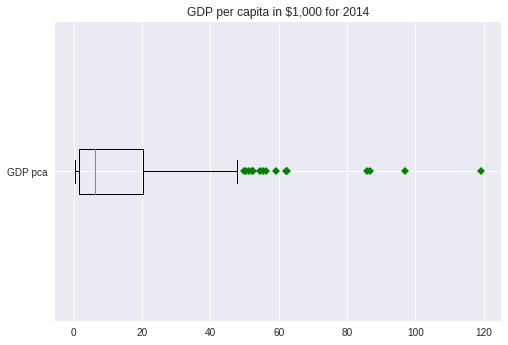

In [5]:
gdp_column = "gdp_%s" % magic_year

gdp_data = ds[gdp_column].dropna()

# gdp_data

plt.figure()
plt.boxplot([gdp_data / 1000], 0, 'gD', 0, labels=["GDP pca"])
plt.title("GDP per capita in $1,000 for %s" % magic_year)
plt.show()

In [6]:
gdp_data.describe()

count       134.000000
mean      16224.437678
std       22316.913842
min         312.748979
25%        1474.134603
50%        6234.432671
75%       20329.203029
max      119172.741757
Name: gdp_2014, dtype: float64

In [7]:
gdp_data.var()

498044643.4290505

In [8]:
kgdp = map(int, gdp_data / 1000)
# print(kgdp)
mode(kgdp)

ModeResult(mode=array([0]), count=array([20]))

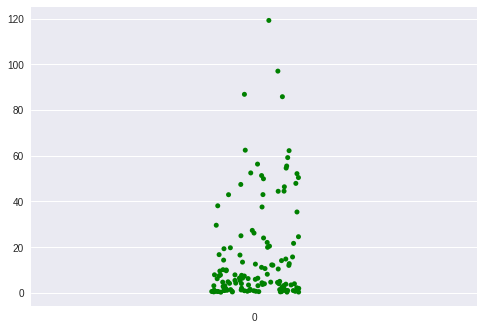

In [9]:
sns.stripplot(data=(gdp_data / 1000), jitter=True, color="g")

### Economic Freedom

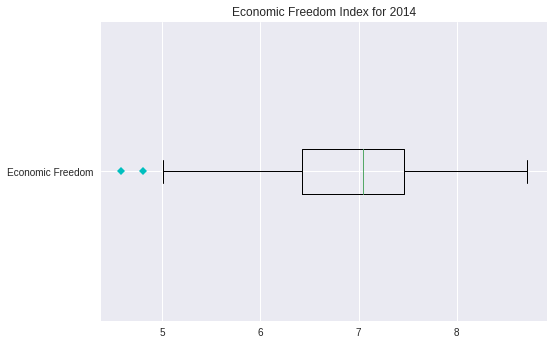

In [10]:
freedom_column = "economic_freedom_index_%s" % magic_year

economic_freedom = ds[freedom_column].dropna()

# econ_freedom_data

plt.figure()
plt.boxplot([economic_freedom], 0, 'cD', 0, labels=["Economic Freedom"])
plt.title("Economic Freedom Index for %s" % magic_year)
plt.show()

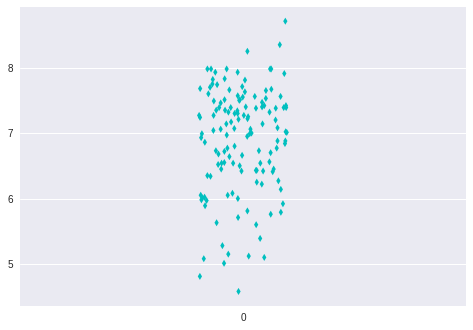

In [11]:
sns.stripplot(data=economic_freedom, jitter=True, color="c", marker="d")

In [12]:
economic_freedom.describe()

count    135.000000
mean       6.892667
std        0.805859
min        4.580000
25%        6.425000
50%        7.040000
75%        7.465000
max        8.710000
Name: economic_freedom_index_2014, dtype: float64

In [13]:
economic_freedom.var()

0.6494092537313432

In [14]:
economic_freedom_ints = map(int, economic_freedom)
# print(economic_freedom_ints)
mode(economic_freedom_ints)

ModeResult(mode=array([7]), count=array([68]))

## Civil Freedom

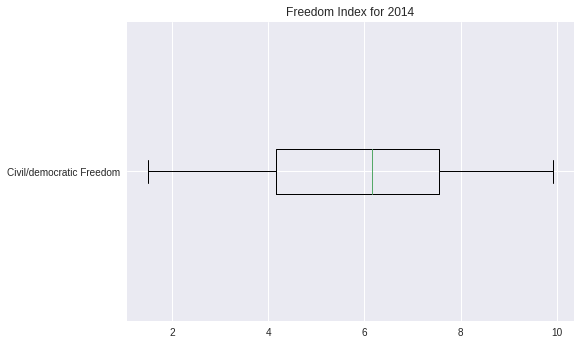

In [15]:
civil_freedom_column = "democracy_score_%s" % magic_year

civil_freedom = ds[civil_freedom_column].dropna()

# civil_freedom_data

plt.figure()
plt.boxplot([civil_freedom], 0, 'bD', 0, labels=["Civil/democratic Freedom"])
plt.title("Freedom Index for %s" % magic_year)
plt.show()

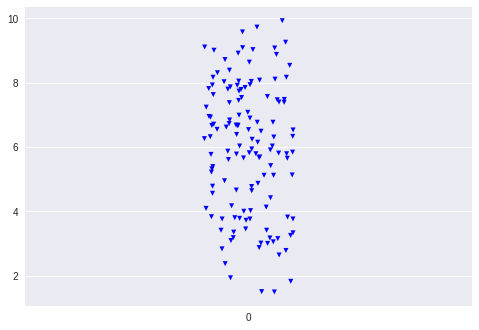

In [16]:
sns.stripplot(data=civil_freedom, jitter=True, color="b", marker="v")

In [17]:
civil_freedom.describe()

count    135.000000
mean       5.954963
std        2.024466
min        1.490000
25%        4.150000
50%        6.150000
75%        7.555000
max        9.930000
Name: democracy_score_2014, dtype: float64

In [18]:
civil_freedom.var()

4.09846249861802

In [19]:
civil_freedom_ints = map(int, civil_freedom)
# print(civil_freedom_ints)
mode(civil_freedom_ints)

ModeResult(mode=array([6]), count=array([27]))

## Visualise relationships

In [20]:
df_viz1 = ds[[gdp_column, freedom_column, civil_freedom_column]].rename(
    columns={gdp_column: "gdp", freedom_column: 'financial_freedom', civil_freedom_column: "civil_freedom"}).dropna()

# Per usual divide GDP w. 1000
df_viz1['gdp'] = df_viz1['gdp'] / 1000

df_viz1.head()

,gdp,financial_freedom,civil_freedom
0,4.709312,5.08,3.35
1,4.575764,7.40,5.67
2,44.449740,7.98,2.64
3,12.245256,4.81,6.84
4,3.994712,7.71,4.13


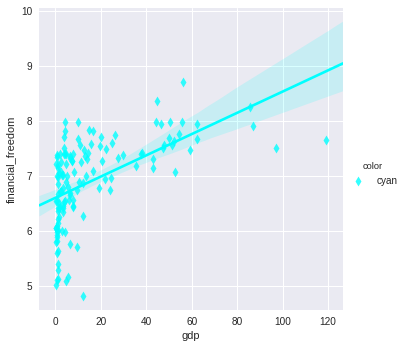

In [21]:
df_viz1['color'] = 'cyan'

sns.lmplot('gdp', 'financial_freedom', df_viz1, line_kws={'color': 'cyan'}, markers=["d"],
           hue="color", palette=dict(cyan="cyan"))

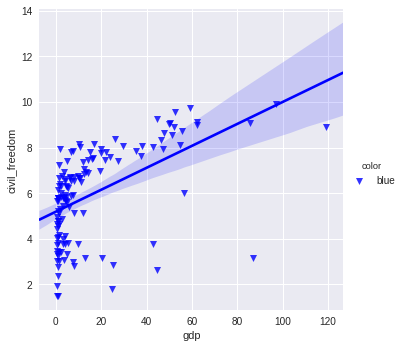

In [22]:
df_viz1['color'] = 'blue'

sns.lmplot('gdp', 'civil_freedom', df_viz1, line_kws={'color': 'blue'}, markers=["v"],
           hue="color", palette=dict(blue="blue"))

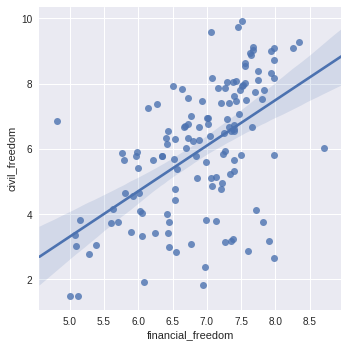

In [23]:
sns.lmplot('financial_freedom', 'civil_freedom', df_viz1)

### Correlation Heatmap

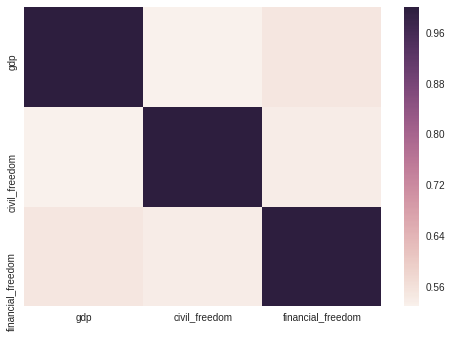

In [25]:
correlations = df_viz1[['gdp', 'civil_freedom', 'financial_freedom']].corr()
sns.heatmap(correlations)